In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/facial-emotion-recognition/emotions.csv
/kaggle/input/facial-emotion-recognition/images/7/Disgust.jpg
/kaggle/input/facial-emotion-recognition/images/7/Anger.jpg
/kaggle/input/facial-emotion-recognition/images/7/Sad.jpg
/kaggle/input/facial-emotion-recognition/images/7/Surprised.jpg
/kaggle/input/facial-emotion-recognition/images/7/Neutral.jpg
/kaggle/input/facial-emotion-recognition/images/7/Happy.jpg
/kaggle/input/facial-emotion-recognition/images/7/Fear.jpg
/kaggle/input/facial-emotion-recognition/images/7/Contempt.jpg
/kaggle/input/facial-emotion-recognition/images/17/Disgust.jpg
/kaggle/input/facial-emotion-recognition/images/17/Anger.jpg
/kaggle/input/facial-emotion-recognition/images/17/Sad.jpg
/kaggle/input/facial-emotion-recognition/images/17/Surprised.jpg
/kaggle/input/facial-emotion-recognition/images/17/Neutral.jpg
/kaggle/input/facial-emotion-recognition/images/17/Happy.jpg
/kaggle/input/facial-emotion-recognition/images/17/Fear.jpg
/kaggle/input/facial-emoti

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Define constants
DATA_DIR = '/kaggle/input/facial-emotion-recognition/images/'
EMOTIONS = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']
IMG_SIZE = 48

# Function to load and preprocess images
def load_data():
    images = []
    labels = []
    
    for emotion_label, emotion in enumerate(EMOTIONS):
        # Get the directory for the current emotion
        emotion_dir = os.path.join(DATA_DIR, str(emotion_label))
        if os.path.isdir(emotion_dir):
            for img_file in os.listdir(emotion_dir):
                img_path = os.path.join(emotion_dir, img_file)
                img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                images.append(img_resized)
                labels.append(emotion_label)  # Assigning label based on index
        else:
            print(f"Directory not found for emotion {emotion}: {emotion_dir}")
        
    return np.array(images), np.array(labels)

# Load the data
images, labels = load_data()

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalize the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data for CNN input
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


Number of images: 64
Shape of images array: (64, 48, 48)
Number of labels: 64


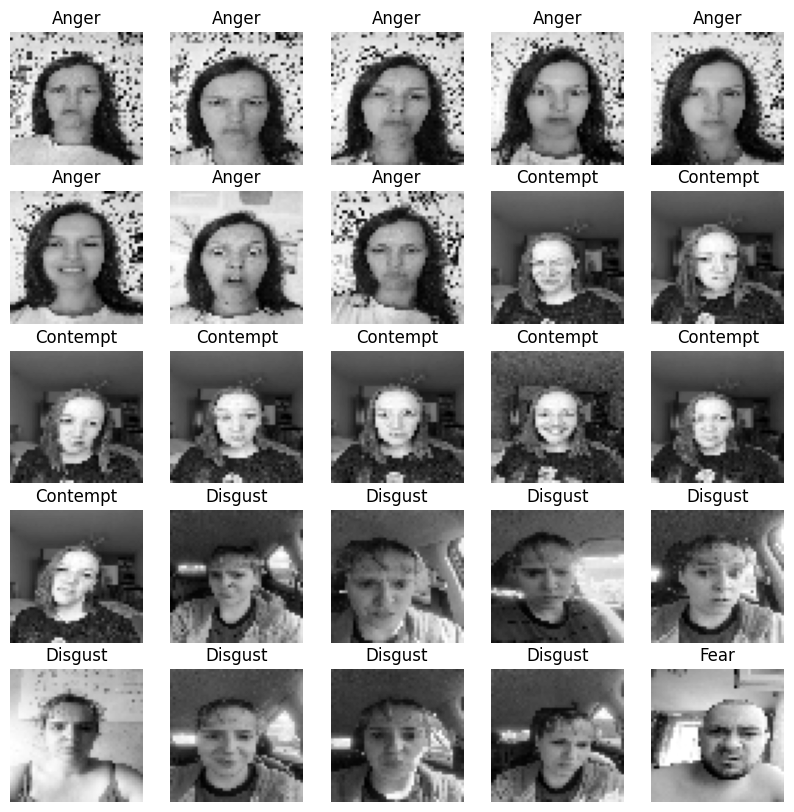

In [3]:
# Print information about the dataset
print("Number of images:", len(images))
print("Shape of images array:", images.shape)
print("Number of labels:", len(labels))

# Print sample images and their corresponding labels
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(EMOTIONS[labels[i]])
    plt.axis('off')
plt.show()


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(EMOTIONS), activation='softmax')  # Output layer with softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


2024-04-15 08:53:16.021927: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 08:53:16.022081: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 08:53:16.208528: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 356ms/step - accuracy: 0.1358 - loss: 2.0807 - val_accuracy: 0.1538 - val_loss: 2.0704
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.1358 - loss: 2.0460 - val_accuracy: 0.3077 - val_loss: 2.0293
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.2949 - loss: 1.9731 - val_accuracy: 0.2308 - val_loss: 1.9546
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.3864 - loss: 1.8637 - val_accuracy: 0.3077 - val_loss: 1.7852
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.5065 - loss: 1.6995 - val_accuracy: 0.6923 - val_loss: 1.5222
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.7833 - loss: 1.4530 - val_accuracy: 0.7692 - val_loss: 1.2011
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.7702 - loss: 1.1691 - val_accuracy: 0.9231 - val_loss: 0.8779
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.9400 - loss: 0.8173 - val_accuracy: 0.9231 - val_loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.0211
Test accuracy: 1.0


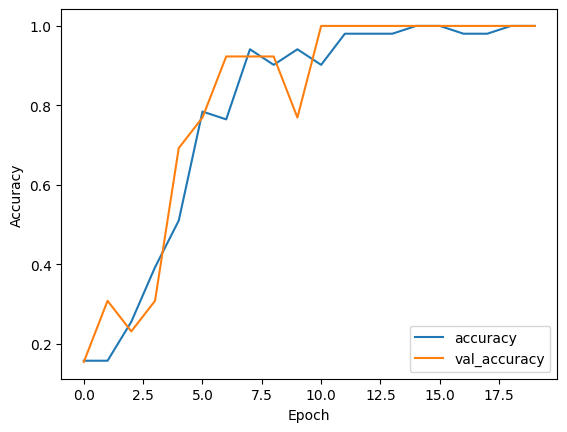

In [5]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [6]:
# Save the model
model.save('/kaggle/working/emotion_detection_model.h5')


In [7]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/kaggle/working/emotion_detection_model.h5')

# Define function to preprocess input image
def preprocess_image(img_path):
    # Load the image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    # Resize the image
    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    # Normalize the pixel values
    img_normalized = img_resized / 255.0
    # Reshape the image for model input
    img_reshaped = img_normalized.reshape(1, IMG_SIZE, IMG_SIZE, 1)
    return img_reshaped

# Provide path to your input image
input_img_path = '/kaggle/input/facial-emotion-recognition/images/0/Anger.jpg'

# Preprocess the input image
input_img = preprocess_image(input_img_path)

# Make prediction using the loaded model
predictions = model.predict(input_img)

# Get the predicted emotion label
predicted_label = EMOTIONS[np.argmax(predictions)]

# Print the predicted label
print("Predicted emotion:", predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Predicted emotion: Anger
